<h1>Movie Lines</h1>


In [1]:
import pandas as pd

movie_lines_features = ["LineID", "Character", "Movie", "Name", "Line"]
movie_lines = pd.read_csv("movie_lines.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_lines_features)
movie_lines.head()

,LineID,Character,Movie,Name,Line
0,L1045,u0,m0,BIANCA,They do not!
1,L1044,u2,m0,CAMERON,They do to!
2,L985,u0,m0,BIANCA,I hope so.
3,L984,u2,m0,CAMERON,She okay?
4,L925,u0,m0,BIANCA,Let's go.


<h1>Movie Characters</h1>

In [2]:
movie_characters_features = ["Character", "Name", "Movie", "Title", "Gender",'Position']
movie_characters = pd.read_csv("movie_characters_metadata.txt", sep = "\+\+\+\$\+\+\+", engine = "python", index_col = False, names = movie_characters_features)
movie_characters = movie_characters[['Character', 'Title', 'Gender']]
movie_characters.head()

,Character,Title,Gender
0,u0,10 things i hate about you,f
1,u1,10 things i hate about you,?
2,u2,10 things i hate about you,m
3,u3,10 things i hate about you,?
4,u4,10 things i hate about you,m


In [3]:
movie_characters.Character.nunique()

9035

<h1>Merging Movies and Characters</h1>

In [4]:
movie_lines.columns

Index(['LineID', 'Character', 'Movie', 'Name', 'Line'], dtype='object')

In [5]:
movie_characters.columns

Index(['Character', 'Title', 'Gender'], dtype='object')

https://stackoverflow.com/questions/39582984/pandas-merging-on-string-columns-not-working-bug

In [6]:
movie_lines.Character = movie_lines.Character.str.strip()

In [7]:
movie_characters.Character = movie_characters.Character.str.strip()

In [8]:
character_lines = movie_characters.merge(movie_lines, left_on='Character', right_on='Character')

In [9]:
character_lines.head()

,Character,Title,Gender,LineID,Movie,Name,Line
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...


<h1>Filter Data</h1>

Female Character Lines


In [10]:
gender_filter_f = character_lines['Gender'].str.strip() == 'f'

In [11]:
character_lines_f = character_lines[gender_filter_f]

In [12]:
character_lines_f.head()

,Character,Title,Gender,LineID,Movie,Name,Line
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...


Male Character Lines

In [13]:
gender_filter_m = character_lines['Gender'].str.strip() == 'm'

In [14]:
character_lines_m = character_lines[gender_filter_m]

In [15]:
#movie_filter = character_lines_m['Movie'].str.strip() == 'm0'

In [16]:
#character_lines_m = character_lines_m[movie_filter]

In [17]:
character_lines_m.head()

,Character,Title,Gender,LineID,Movie,Name,Line
101,u2,10 things i hate about you,m,L1044,m0,CAMERON,They do to!
102,u2,10 things i hate about you,m,L984,m0,CAMERON,She okay?
103,u2,10 things i hate about you,m,L924,m0,CAMERON,Wow
104,u2,10 things i hate about you,m,L871,m0,CAMERON,No
105,u2,10 things i hate about you,m,L868,m0,CAMERON,"The ""real you""."


<h1>Wordclouds</h1>

https://www.python-lernen.de/wordcloud-erstellen-python.htm

Wordcloud Male


male:


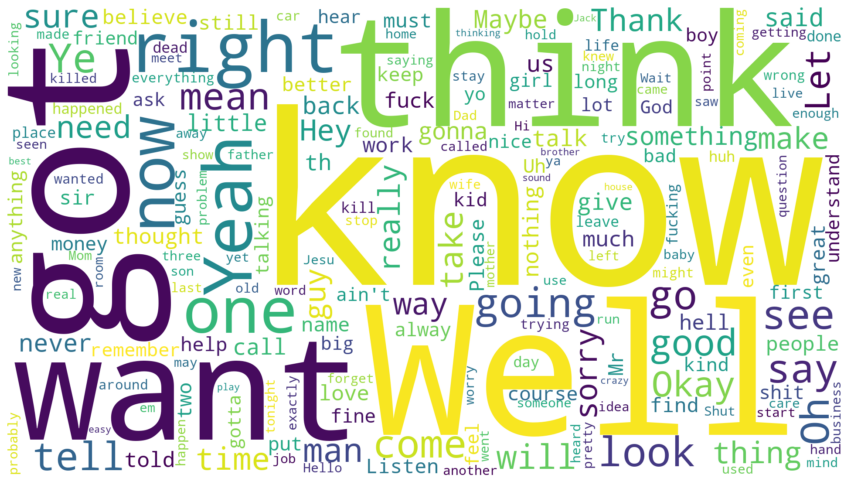

female:


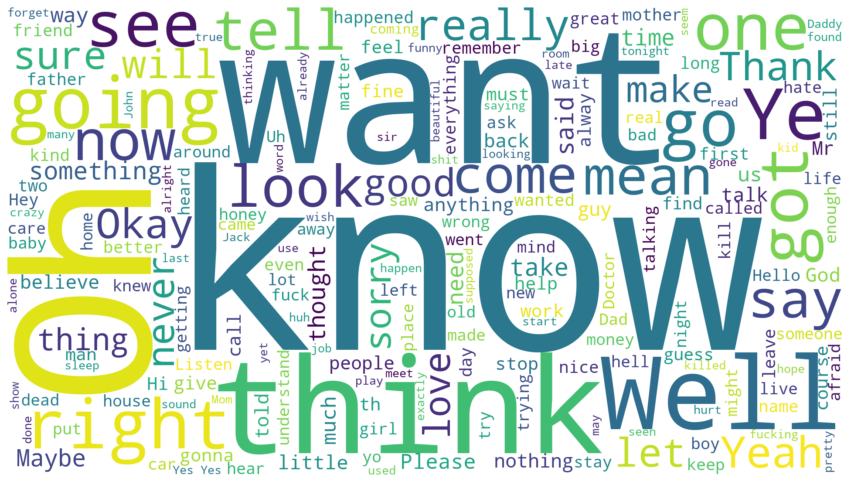

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate a word for male lines
wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate(character_lines_m.Line.to_string())
print('male:')
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Generate a word for female lines
wordcloud = WordCloud(background_color="white",width=1920, height=1080).generate(character_lines_f.Line.to_string())
print('female:')
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<h1>Count Words</h1>

In [21]:
unique_words_male = character_lines_m.Line.to_numpy().nonzero()[0].size
print('Number of unique words male:' ,unique_words_male)
words_male = len(character_lines_m.Line.to_string().split())
print('Number of words male:' ,words_male)
unique_words_male / words_male

Number of unique words male: 154133
Number of words male: 1125684


0.13692386140337787

In [22]:
unique_words_female = character_lines_f.Line.to_numpy().nonzero()[0].size
print('Number of unique words female:' ,unique_words_female)
words_female = len(character_lines_f.Line.to_string().split())
print('Number of words female:' ,words_female)
unique_words_female / words_female

Number of unique words female: 66228
Number of words female: 477342


0.13874329097376722

=> Die Dialoge von Frauen nutzen einen größeren Wortschatz als die der Männer


<h1>Sentiment Analysis</h1>

In [28]:
from textblob import TextBlob


pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

character_lines_m['polarity'] = character_lines_m.Line.apply(str).apply(pol)
character_lines_m['subjectivity'] = character_lines_m.Line.apply(str).apply(sub)
character_lines_m

<ipython-input-28-55bc0b90a1fe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_lines_m['polarity'] = character_lines_m.Line.apply(str).apply(pol)
<ipython-input-28-55bc0b90a1fe>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_lines_m['subjectivity'] = character_lines_m.Line.apply(str).apply(sub)


,Character,Title,Gender,LineID,Movie,Name,Line,polarity,subjectivity
101,u2,10 things i hate about you,m,L1044,m0,CAMERON,They do to!,0.0,0.000000
102,u2,10 things i hate about you,m,L984,m0,CAMERON,She okay?,0.5,0.500000
103,u2,10 things i hate about you,m,L924,m0,CAMERON,Wow,0.1,1.000000
104,u2,10 things i hate about you,m,L871,m0,CAMERON,No,0.0,0.000000
105,u2,10 things i hate about you,m,L868,m0,CAMERON,"The ""real you"".",0.2,0.300000
...,...,...,...,...,...,...,...,...,...
304607,u9022,young frankenstein,m,L665390,m615,MEDICAL STUDENT,But aren't you the grandson of the famous Dr....,0.4,0.783333
304608,u9022,young frankenstein,m,L665388,m615,MEDICAL STUDENT,Oh! I thought it was Dr. Frankenstein.,0.0,0.000000
304609,u9022,young frankenstein,m,L665386,m615,MEDICAL STUDENT,I beg your pardon?,0.0,0.000000
polarity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000


In [29]:
x_m = character_lines_m.polarity.mean()
x_m

0.04236447631866352

In [30]:
y_m = character_lines_m.subjectivity.mean()
y_m

0.23959501547740883

In [31]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

character_lines_f['polarity'] = character_lines_f.Line.apply(str).apply(pol)
character_lines_f['subjectivity'] = character_lines_f.Line.apply(str).apply(sub)


<ipython-input-31-d6f8021a51d9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_lines_f['polarity'] = character_lines_f.Line.apply(str).apply(pol)
<ipython-input-31-d6f8021a51d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  character_lines_f['subjectivity'] = character_lines_f.Line.apply(str).apply(sub)


In [32]:
character_lines_f

,Character,Title,Gender,LineID,Movie,Name,Line,polarity,subjectivity
0,u0,10 things i hate about you,f,L1045,m0,BIANCA,They do not!,0.000000,0.000000
1,u0,10 things i hate about you,f,L985,m0,BIANCA,I hope so.,0.000000,0.000000
2,u0,10 things i hate about you,f,L925,m0,BIANCA,Let's go.,0.000000,0.000000
3,u0,10 things i hate about you,f,L872,m0,BIANCA,Okay -- you're gonna need to learn how to lie.,0.500000,0.500000
4,u0,10 things i hate about you,f,L870,m0,BIANCA,I'm kidding. You know how sometimes you just...,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
304585,u9020,young frankenstein,f,L665949,m615,INGA,Look how far we've come.,0.100000,1.000000
304586,u9020,young frankenstein,f,L665900,m615,INGA,I'm getting tired.,-0.400000,0.700000
304587,u9020,young frankenstein,f,L665885,m615,INGA,"It's working! Oh, Doctor -- you play beautif...",0.850000,1.000000
304588,u9020,young frankenstein,f,L665695,m615,INGA,His schwanzstucker.,0.000000,0.000000


In [33]:
x_f = character_lines_f.polarity.mean() 
x_f

0.04121171575910405

In [34]:
y_f = character_lines_f.subjectivity.mean()
y_f

0.2437820513806797

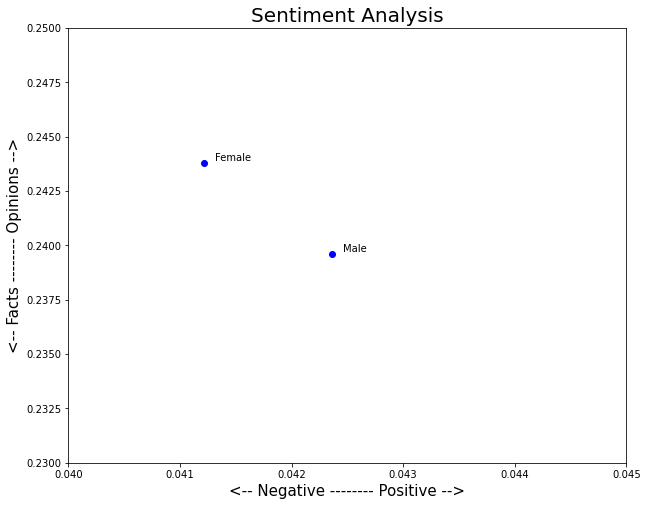

In [35]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]



plt.scatter(x_m, y_m, color='blue')
plt.text(x_m+.0001, y_m+.0001, 'Male', fontsize=10)
#plt.xlim(.043, .045) 


plt.scatter(x_f, y_f, color='blue')
plt.text(x_f+.0001, y_f+.0001, 'Female', fontsize=10)
plt.xlim(.040, .045) 
plt.ylim(.23, .25) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()